In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

# Reading data

In [3]:
dataset=pd.read_csv("data.csv")

In [4]:
dataset.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [5]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
dataset.shape

(863, 14)

In [7]:
x_data=dataset[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']]
x_data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [8]:
y_data=dataset[['result']]
y_data

,result
0,1
1,0
2,0
3,0
4,0
...,...
858,1
859,0
860,0
861,0


In [9]:
labels=['0-20', '20-40', '40-60', '60+']
bins=[0,20,40,60,float('inf')]

In [10]:
df = pd.DataFrame({})

In [11]:
df['age_groups']=pd.cut(dataset['age'],bins=bins,labels=['0-20', '20-40', '40-60', '60+'])

Text(0.5, 1.0, 'age groups bins')

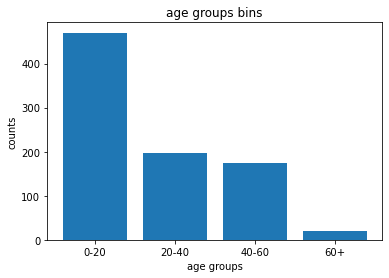

In [12]:
plt.bar(labels,df['age_groups'].value_counts())
plt.xlabel("age groups")
plt.ylabel("counts")
plt.title("age groups bins")

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
x_data=scaler.fit_transform(x_data)

In [16]:
x_data=pd.DataFrame(x_data)

In [17]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.698221,-1.15245,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,0.621646,-1.15245,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,1.540540,-1.15245,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,1.004519,-1.15245,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,1.004519,-1.15245,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [18]:
x_data.columns=['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']

In [19]:
x_data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,0.698221,-1.15245,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,0.621646,-1.15245,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,1.540540,-1.15245,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,1.004519,-1.15245,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,1.004519,-1.15245,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=None)

In [21]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.111,random_state=None)

In [22]:
print(x_test.shape)
print(x_train.shape)
#print(x_val.shape)

(87, 13)
(689, 13)


In [23]:
x_train.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
669,-0.807744,-0.511870,0.207592,-0.690092,-0.471571,2.877424,-1.536471,0.401355,0.244914,0.135161,0.054668,0.03406,0.001966
666,1.132143,1.666102,1.585683,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
394,0.749270,0.769290,-1.170499,1.698687,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
406,0.800320,0.897406,-1.170499,0.570653,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
707,-0.807744,-0.511870,-1.170499,0.836072,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [24]:
x_val.head()

In [25]:
y_test.head()

,result
590,0
534,0
544,0
49,0
476,0


In [26]:
x_test.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
590,1.208717,-1.280566,0.207592,-0.955511,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
534,0.953469,1.537986,1.585683,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
544,0.953469,1.537986,-1.170499,0.305233,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
49,-0.782219,-1.152450,0.207592,-0.623737,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.940711
476,0.800320,0.897406,1.585683,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [27]:
dataset.describe(include="all")

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [28]:
import seaborn as sns

<AxesSubplot:>

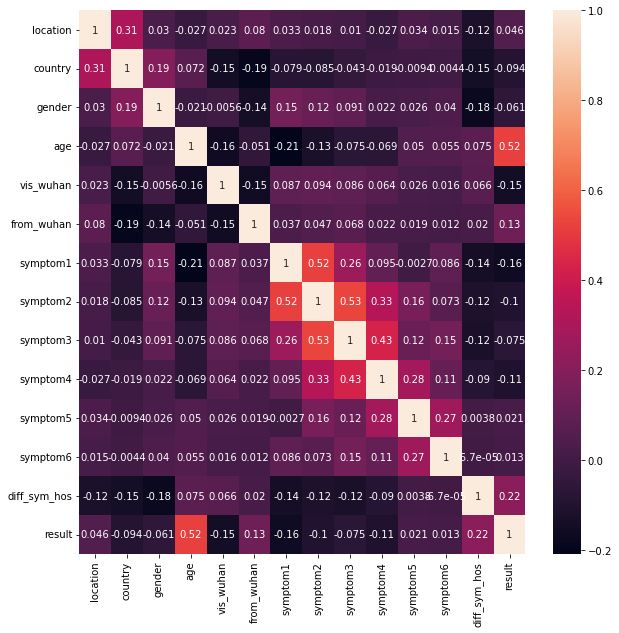

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, ax=ax)

In [30]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# SVM

In [31]:
from sklearn import svm

In [32]:
from sklearn.metrics import roc_curve, auc

In [33]:
from sklearn.metrics import classification_report


### polynomial kernel

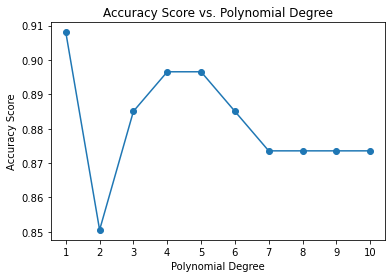

In [34]:
c=[1,2,3,4,5,6,7,8,9,10]
degrees=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for poly in degrees:
    model=svm.SVC(kernel="poly",degree=poly)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(degrees, scores, '-o')
plt.title('Accuracy Score vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy Score')
plt.xticks(degrees)
plt.show()

In [35]:
c=[1,2,3,4,5,6,7,8,9,10,11,12]
degrees=[1,2,3,4,5,6,7,8,9,10]
max_score=0
for degree in degrees:
    for constant in c:
        model=svm.SVC(kernel="poly",degree=degree,C=constant)
        model.fit(x_train,y_train)
        score=model.score(x_val,y_val)
        if (score>max_score):  
            max_score=score
            max_degree=degree
            max_c=constant
print("use degree:",max_degree,"c value:",max_c)

use degree: 3 c value: 12


In [114]:
model=svm.SVC(kernel="poly",degree=3,C=12)
model.fit(x_train,y_train)
model.score(x_val,y_val)

0.9540229885057471

In [115]:
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.80      0.89        10

    accuracy                           0.98        87
   macro avg       0.99      0.90      0.94        87
weighted avg       0.98      0.98      0.98        87



In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

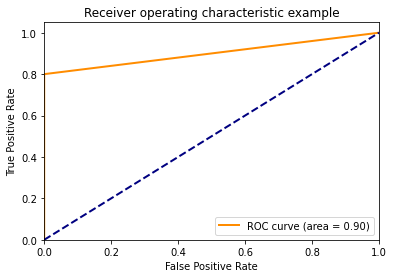

In [117]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

### rbf kernel

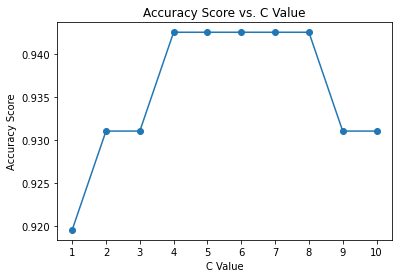

In [118]:
c=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for constant in c:
    model=svm.SVC(kernel="rbf",C=constant)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(c, scores, '-o')
plt.title('Accuracy Score vs. C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy Score')
plt.xticks(c)
plt.show()

In [119]:
model=svm.SVC(kernel="rbf",C=4)
model.fit(x_train,y_train)
model.score(x_val,y_val)

0.9425287356321839

In [120]:
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.70      0.82        10

    accuracy                           0.97        87
   macro avg       0.98      0.85      0.90        87
weighted avg       0.97      0.97      0.96        87



In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

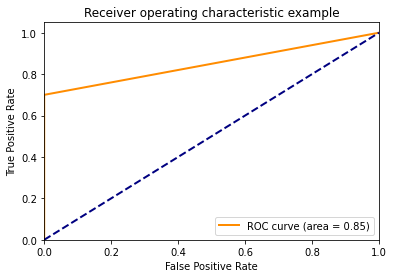

In [122]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

## linear kernel

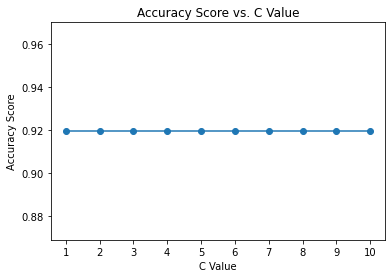

In [123]:
c=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for constant in c:
    model=svm.SVC(kernel="linear",C=constant)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(c, scores, '-o')
plt.title('Accuracy Score vs. C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy Score')
plt.xticks(c)
plt.show()

In [124]:
model=svm.SVC(kernel="linear",C=2)
model.fit(x_train,y_train)
model.score(x_val,y_val)

0.9195402298850575

In [125]:
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        77
           1       0.86      0.60      0.71        10

    accuracy                           0.94        87
   macro avg       0.90      0.79      0.84        87
weighted avg       0.94      0.94      0.94        87



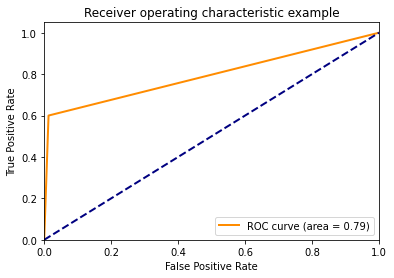

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

## sigmoid kernel

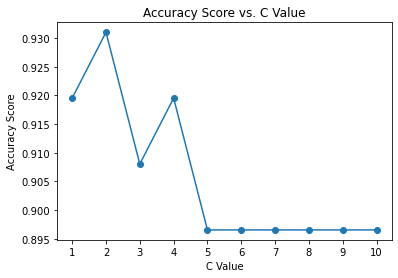

In [127]:
c=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for constant in c:
    model=svm.SVC(kernel="sigmoid",C=constant)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(c, scores, '-o')
plt.title('Accuracy Score vs. C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy Score')
plt.xticks(c)
plt.show()

In [128]:
model=svm.SVC(kernel="sigmoid",C=2)
model.fit(x_train,y_train)
model.score(x_val,y_val)

0.9310344827586207

In [129]:
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.38      0.30      0.33        10

    accuracy                           0.86        87
   macro avg       0.64      0.62      0.63        87
weighted avg       0.85      0.86      0.86        87



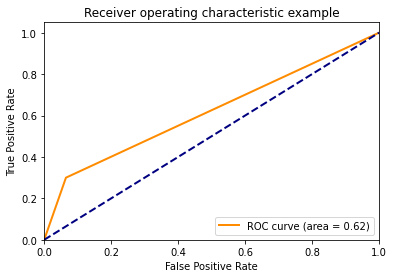

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# Bayes 

In [131]:
from sklearn.naive_bayes import GaussianNB

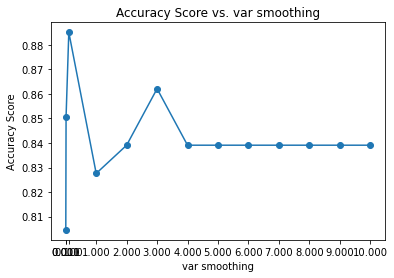

<Figure size 720x720 with 0 Axes>

0.1
0.8850574712643678


In [132]:
var_smoothing=[0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10]
scores=[]
max_score=0
for var in var_smoothing:
    model= GaussianNB(var_smoothing=var)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
    if (score>max_score):
        max_score=score
        max_var=var
plt.plot(var_smoothing, scores, '-o')
plt.title('Accuracy Score vs. var smoothing')
plt.xlabel('var smoothing')
plt.ylabel('Accuracy Score')
plt.xticks(var_smoothing)
plt.figure(figsize=(10, 10))
plt.show()

print(max_var)
print(max_score)

In [133]:
model=GaussianNB(var_smoothing=0.1)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.8850574712643678
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        77
           1       0.50      0.70      0.58        10

    accuracy                           0.89        87
   macro avg       0.73      0.80      0.76        87
weighted avg       0.91      0.89      0.89        87



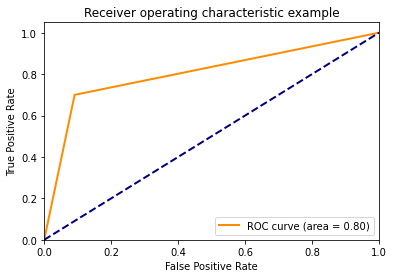

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [135]:
model=GaussianNB(var_smoothing=0.01)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.8505747126436781
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        77
           1       0.40      0.80      0.53        10

    accuracy                           0.84        87
   macro avg       0.69      0.82      0.72        87
weighted avg       0.90      0.84      0.86        87



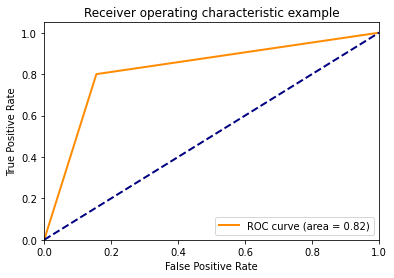

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [59]:
model=GaussianNB(var_smoothing=0.1)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.8850574712643678
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        77
           1       0.50      0.70      0.58        10

    accuracy                           0.89        87
   macro avg       0.73      0.80      0.76        87
weighted avg       0.91      0.89      0.89        87



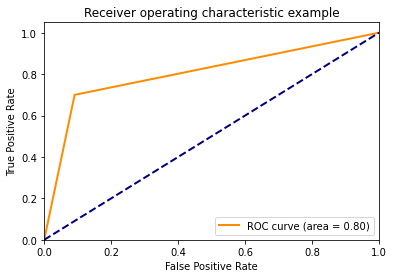

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [137]:
model=GaussianNB(var_smoothing=0.2)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.8850574712643678
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        77
           1       0.46      0.60      0.52        10

    accuracy                           0.87        87
   macro avg       0.70      0.75      0.72        87
weighted avg       0.89      0.87      0.88        87



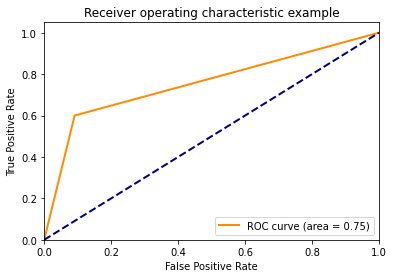

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [139]:
model=GaussianNB(var_smoothing=0.3)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.8505747126436781
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        77
           1       0.55      0.60      0.57        10

    accuracy                           0.90        87
   macro avg       0.75      0.77      0.76        87
weighted avg       0.90      0.90      0.90        87



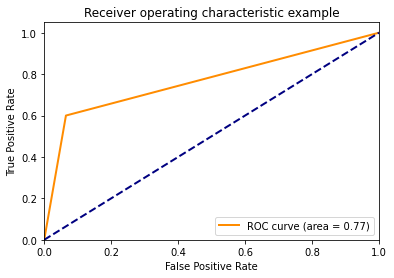

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
grid_parameters={
    "var_smoothing":[1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01,1]
}

In [143]:
model=GaussianNB()
grid_search=GridSearchCV(model,grid_parameters)
grid_search.fit(x_train,y_train)
print(grid_search.best_estimator_)

GaussianNB(var_smoothing=1)


In [144]:
GaussianNB(var_smoothing=1)
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.3333333333333333
              precision    recall  f1-score   support

           0       1.00      0.13      0.23        77
           1       0.13      1.00      0.23        10

    accuracy                           0.23        87
   macro avg       0.56      0.56      0.23        87
weighted avg       0.90      0.23      0.23        87



In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

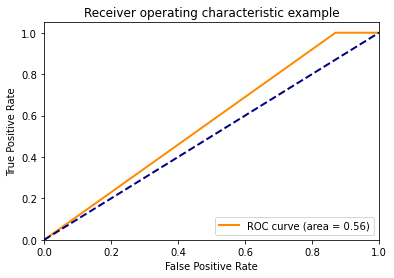

In [146]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

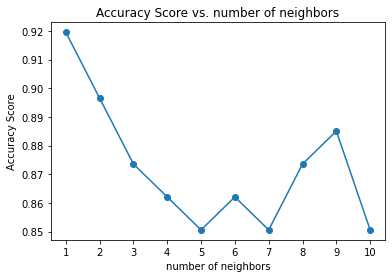

In [148]:
neighbors=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for n in neighbors:
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    scores.append(score)
plt.plot(neighbors, scores, '-o')
plt.title('Accuracy Score vs. number of neighbors')
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy Score')
plt.xticks(neighbors)
plt.show()

In [149]:
neighbors=[1,3,5,7,9,11,13,15]
leaf_size=[1,10,20,30,40]
metric=['minkowski','euclidean','manhattan','chebyshev']
scores=[]
max_score=0
for n in neighbors:
    for l in leaf_size:
        for m in metric:
            model=KNeighborsClassifier(n_neighbors=n , leaf_size=l, metric=m)
            model.fit(x_train,y_train)
            score=model.score(x_val,y_val)
            scores.append(score)
            if (score>max_score):
                max_score=score
                max_neighbors=n
                max_leafsize=l
                best_metric=m
print(max_score)
print("number of neighbors:",max_neighbors)
print("leaf_size:",max_leafsize)
print("distnace metric:",best_metric)

0.9195402298850575
number of neighbors: 1
leaf_size: 1
distnace metric: minkowski


In [150]:
model=KNeighborsClassifier(n_neighbors=1 , leaf_size=1, metric='chebyshev')
model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.9080459770114943
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.70      0.82        10

    accuracy                           0.97        87
   macro avg       0.98      0.85      0.90        87
weighted avg       0.97      0.97      0.96        87



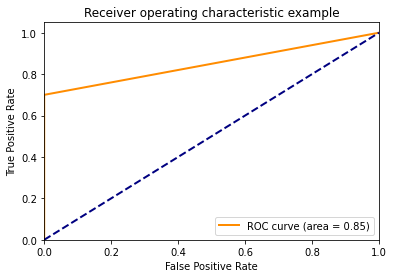

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [152]:
model=KNeighborsClassifier(n_neighbors=1 , leaf_size=1, metric='minkowski')
model=model.fit(x_train,y_train)
print(model.score(x_val,y_val))
y_predict=model.predict(x_test)
print(classification_report(y_test,y_predict))

0.9195402298850575
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.70      0.82        10

    accuracy                           0.97        87
   macro avg       0.98      0.85      0.90        87
weighted avg       0.97      0.97      0.96        87



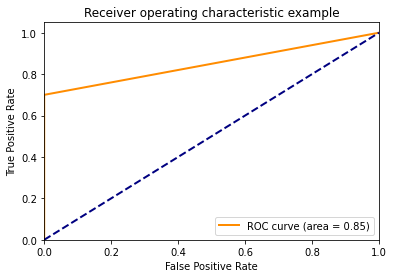

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

criterion: The function to measure the quality of a split. It can be set to "gini" for the Gini impurity or "entropy" for information gain. By default, it is set to "gini".

max_depth: The maximum depth of the decision tree. If not specified, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node. By default, it is set to 2. Increasing this value can prevent overfitting.

min_samples_leaf: The minimum number of samples required to be at a leaf node. By default, it is set to 1. Increasing this value can prevent overfitting.

In [87]:
criteria=['gini','entropy']
for criterion in criteria:
    tree=DecisionTreeClassifier(criterion=criterion)
    auc_scores = cross_val_score(tree, x_train, y_train, cv=5, scoring='roc_auc')
    print(auc_scores.mean(),criterion)

0.8960561497326204 gini
0.895138551288284 entropy


In [102]:
tree = DecisionTreeClassifier(criterion='gini')
tree=tree.fit(x_train,y_train)
score = tree.score(x_val, y_val)

In [103]:
y_predict=tree.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.91      1.00      0.95        10

    accuracy                           0.99        87
   macro avg       0.95      0.99      0.97        87
weighted avg       0.99      0.99      0.99        87



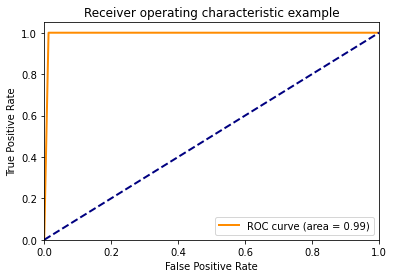

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

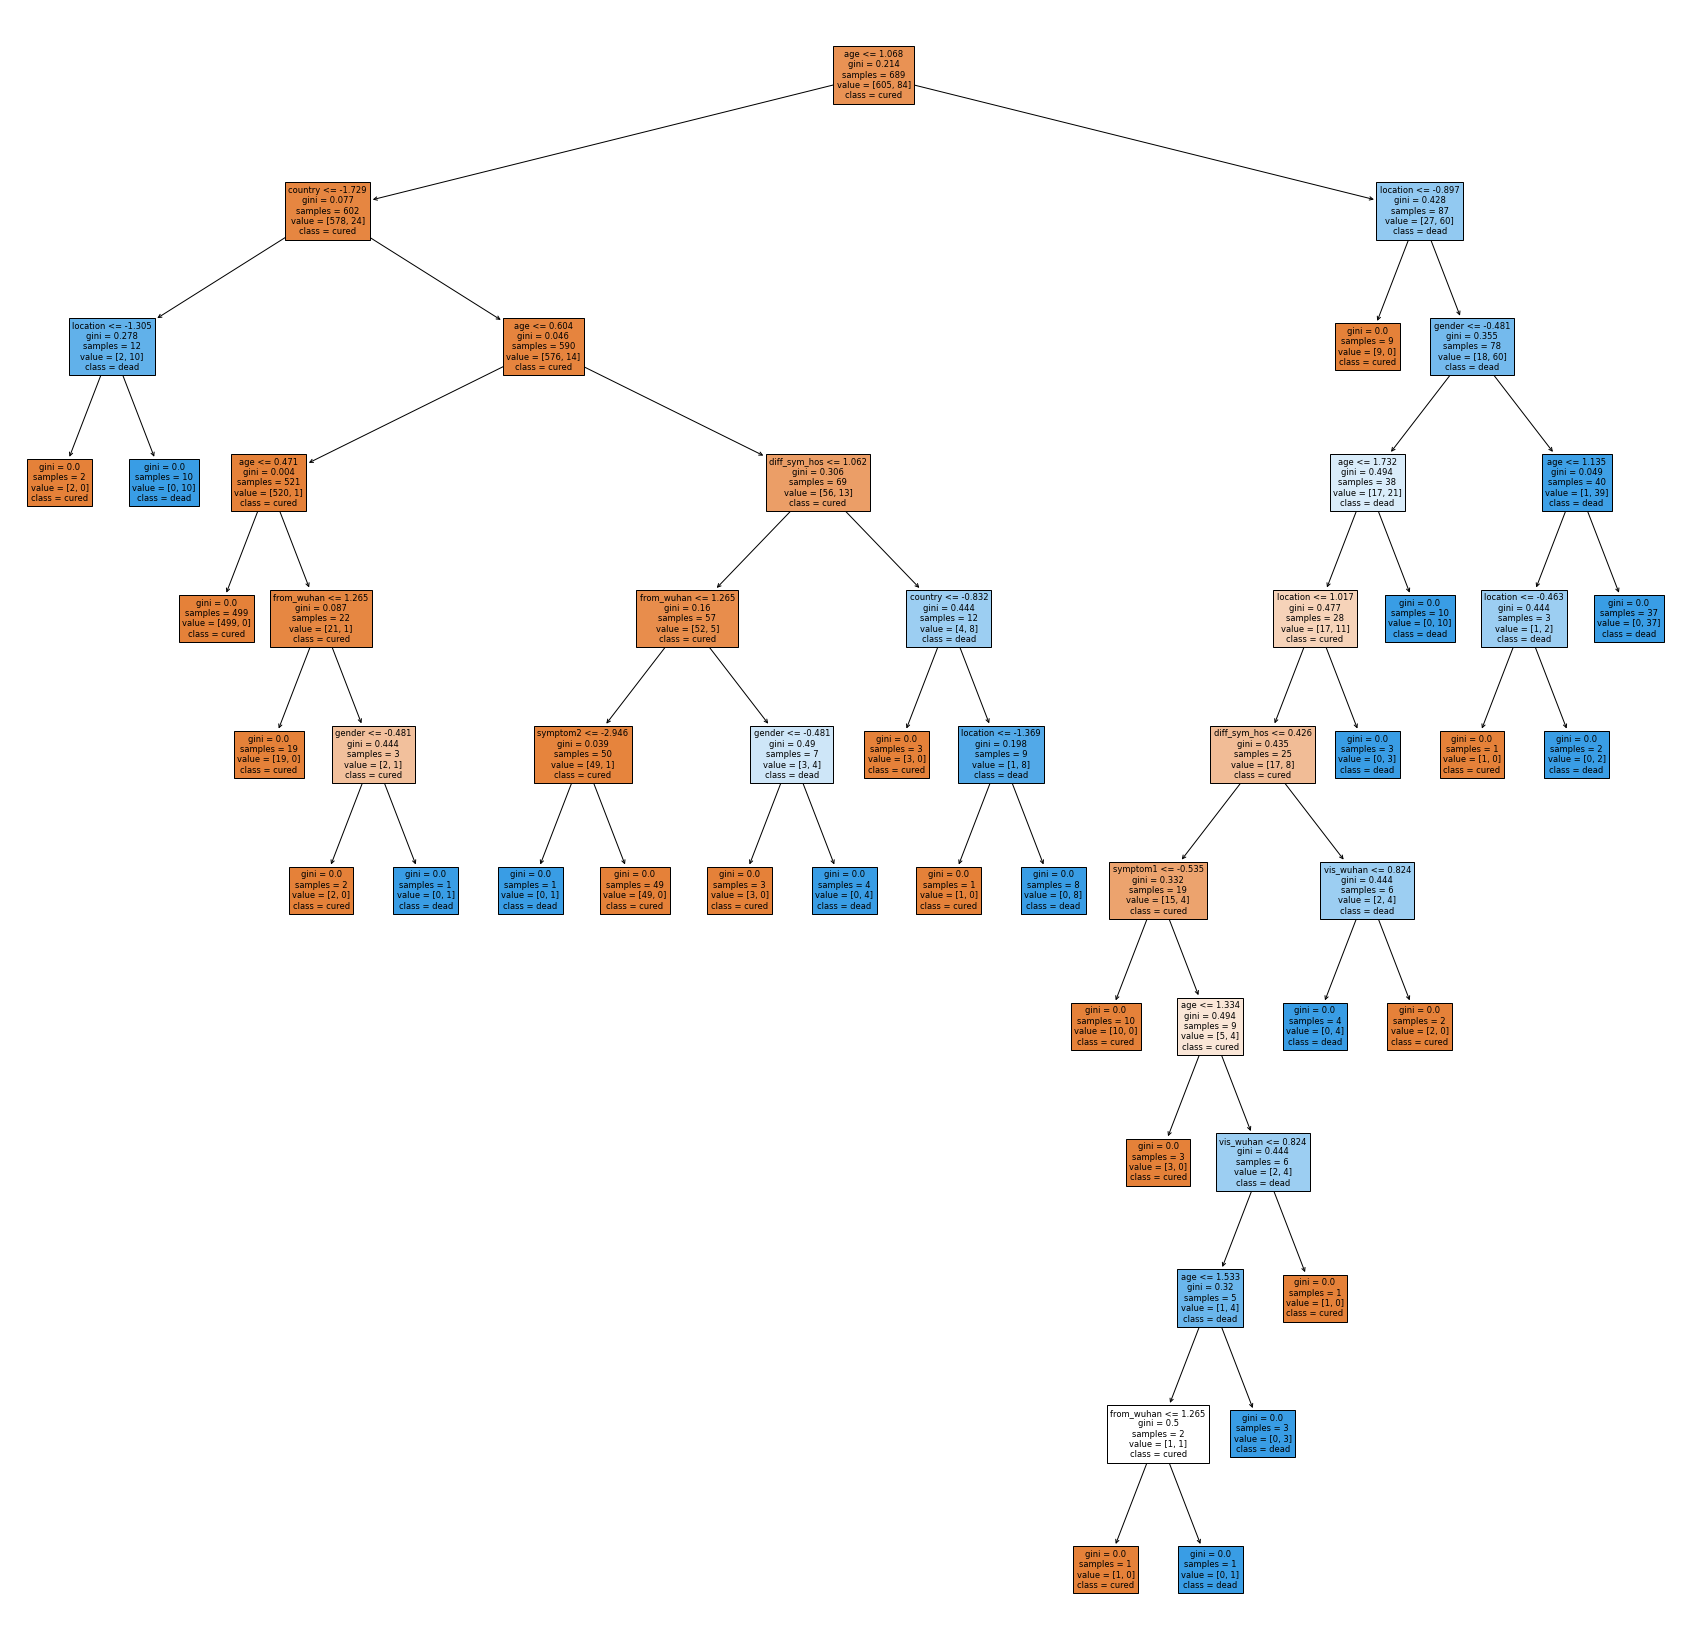

In [105]:
from sklearn.tree import plot_tree
features = ['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
            'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
            'diff_sym_hos']
plt.figure(figsize=(30, 30))
plot_tree(tree, feature_names=features, class_names=['cured', 'dead'], filled=True)
plt.show()


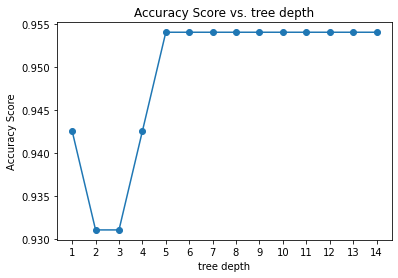

In [107]:
depths=[i for i in range (1,15)]
scores=[]
for depth in range(1,15):
    tree=DecisionTreeClassifier(max_depth=depth)
    tree.fit(x_train,y_train)
    score=tree.score(x_val,y_val)
    scores.append(score)
plt.plot(depths, scores, '-o')
plt.title('Accuracy Score vs. tree depth')
plt.xlabel('tree depth')
plt.ylabel('Accuracy Score')
plt.xticks(depths)
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       0.90      0.90      0.90        10

    accuracy                           0.98        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.98      0.98      0.98        87



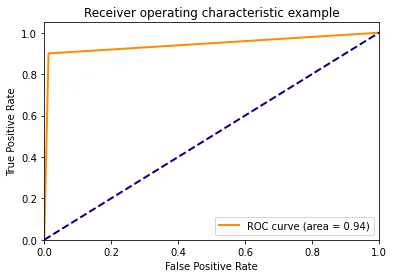

In [108]:
tree=DecisionTreeClassifier(max_depth=5)
tree=tree.fit(x_train,y_train)
score = tree.score(x_val, y_val)
y_predict=tree.predict(x_test)
print(classification_report(y_test,y_predict))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.83      1.00      0.91        10

    accuracy                           0.98        87
   macro avg       0.92      0.99      0.95        87
weighted avg       0.98      0.98      0.98        87



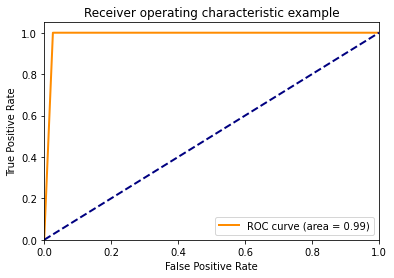

In [112]:
tree=DecisionTreeClassifier(max_depth=9)
tree=tree.fit(x_train,y_train)
score = tree.score(x_val, y_val)
y_predict=tree.predict(x_test)
print(classification_report(y_test,y_predict))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

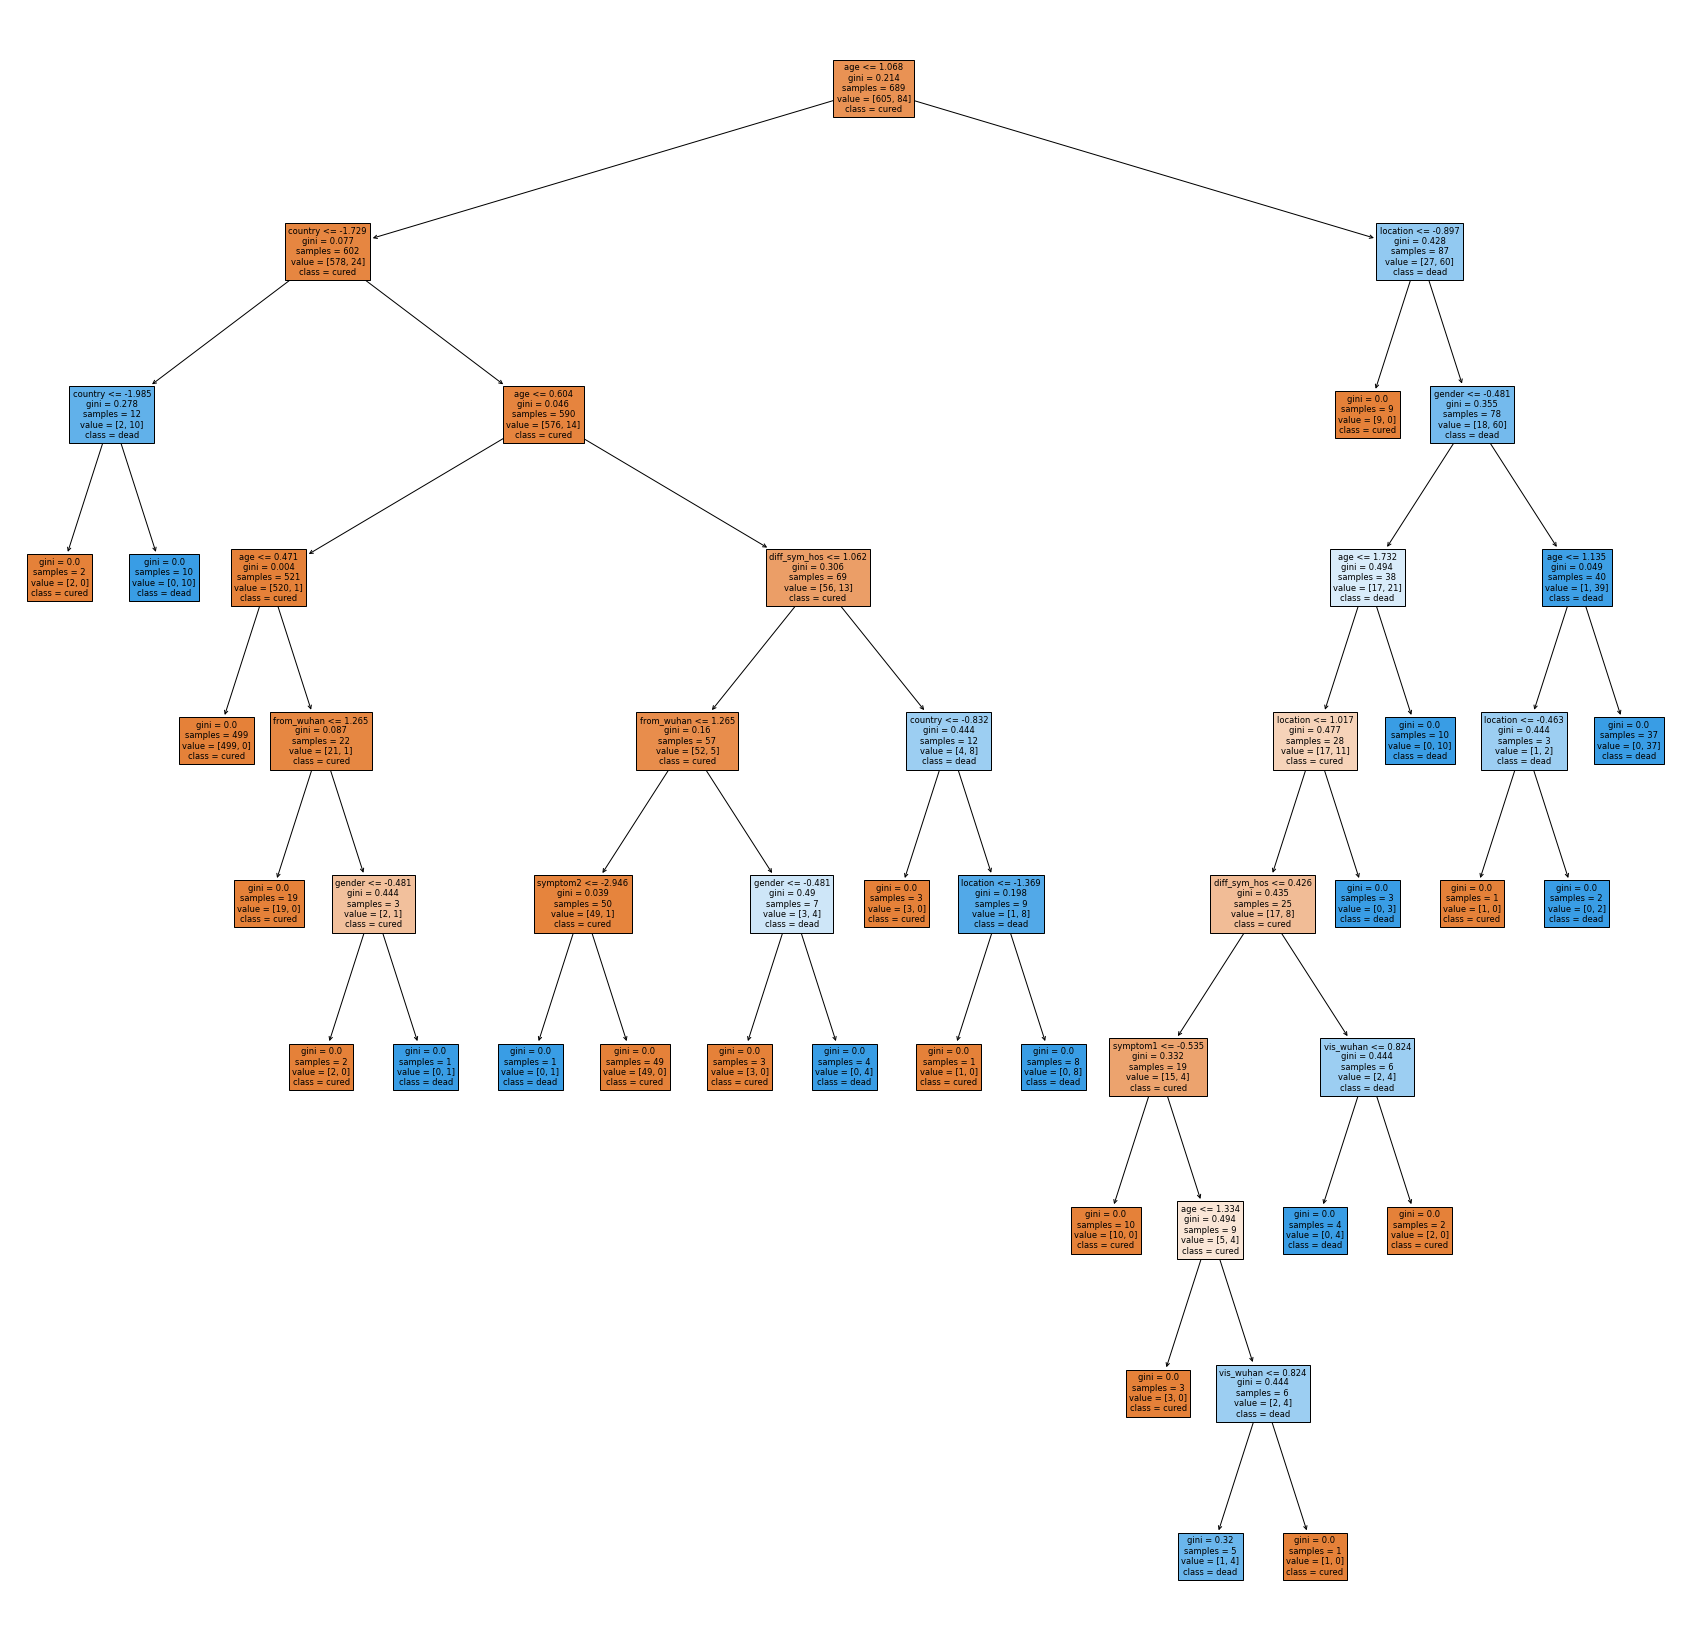

In [113]:
features = ['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
            'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
            'diff_sym_hos']
plt.figure(figsize=(30, 30))
plot_tree(tree, feature_names=features, class_names=['cured', 'dead'], filled=True)
plt.show()

# Multi‐Layer Perceptron

In [154]:
from sklearn.neural_network import MLPClassifier

In [155]:
mlp = MLPClassifier(random_state=1)
param_grid={'activation':['logistic','tanh'],
           'learning_rate':['constant','adaptive'],
           'learning_rate_init':[0.001,0.01,0.1,1]}
grid_search = GridSearchCV(mlp, param_grid,scoring='roc_auc')

In [156]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'tanh'],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1, 1]},
             scoring='roc_auc')

In [161]:
grid_search.best_params_

{'activation': 'tanh', 'learning_rate': 'constant', 'learning_rate_init': 0.1}

In [157]:
best_model = grid_search.best_estimator_

In [158]:
best_model.score(x_val,y_val)

0.9540229885057471

In [159]:
y_predict = best_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       0.90      0.90      0.90        10

    accuracy                           0.98        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.98      0.98      0.98        87



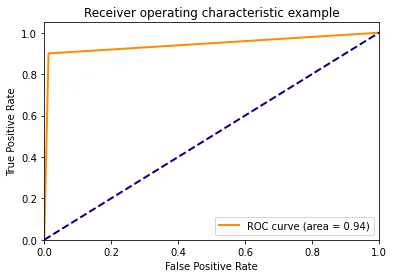

In [160]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")